# Preliminaries

In [9]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)
from numpy import sqrt 
# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import brier_score_loss

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibrationDisplay

import sys



pandas: 1.4.4
geopandas: 1.22.3
Tensorflow/Keras: 2.9.0
pandas: 1.4.4
numpy: 1.22.3


In [4]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [36]:
def dataLoad_new():
    #loading datas
    test = pd.read_csv('data/realtarget_shear/test_with_shear.csv')
    test = test.loc[test.time>='2016-04-01']
    train = pd.read_csv('data/realtarget_shear/training_with_shear.csv')
    val = pd.read_csv('data/realtarget_shear/valid_with_shear.csv')
    print("loading datas")
    
    #adding Shear
    #train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #print("adding Shear")

    #drop unnamed
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])

    #standardization
    scaler = StandardScaler()
    cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_std,val_std,test_std = train,val,test
    # apply standardization on numerical features
    train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    
    #extracting images
    #training set has 11323 days
    variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_img_std = extract_images(train_std, variables, verbose=False)
    val_img_std = extract_images(val_std, variables, verbose=False)
    test_img_std = extract_images(test_std, variables, verbose=False)
    #test_img_std_old = extract_images(test_std.loc[test.time<='2019-12-01'], variables, verbose=False)
    print(train_img_std.shape,val_img_std.shape,test_img_std.shape)
    print("extracting images")
    
    #extracting the targets
        
    def threshold(x):
        if x >= 50.0:
            return 1.0
        else:
            return 0.0

    # apply the function to the "Real_tom_target" column
    train['Real_tom_target'] = train['Real_tom_target'].apply(threshold)
    test['Real_tom_target'] = test['Real_tom_target'].apply(threshold)
    val['Real_tom_target'] = val['Real_tom_target'].apply(threshold)
    
    y_train = train.loc[:,['Real_tom_target','latitude','longitude','time']]
    y_val= val.loc[:,['Real_tom_target','latitude','longitude','time']]
    y_test = test.loc[:,['Real_tom_target','latitude','longitude','time']]
    
    variables_y = [ 'Real_tom_target']
    y_train_img = extract_images(y_train, variables_y, verbose=False)
    y_val_img = extract_images(y_val, variables_y, verbose=False)
    y_test_img  = extract_images(y_test, variables_y, verbose=False)
    print("extracting the targets")
    return train_img_std, y_train_img, val_img_std, y_val_img, test_img_std, y_test_img

In [69]:
def dataLoad_new_2019():
    #loading datas
    test = pd.read_csv('data/realtarget_shear/test_with_shear.csv')
    test = test.loc[(test.time>='2016-04-01') & (test.time<='2019-12-01')]
    train = pd.read_csv('data/realtarget_shear/training_with_shear.csv')
    val = pd.read_csv('data/realtarget_shear/valid_with_shear.csv')
    print("loading datas")
    
    #adding Shear
    #train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #print("adding Shear")

    #drop unnamed
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])

    #standardization
    scaler = StandardScaler()
    cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_std,val_std,test_std = train,val,test
    # apply standardization on numerical features
    train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    
    #extracting images
    #training set has 11323 days
    variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_img_std = extract_images(train_std, variables, verbose=False)
    val_img_std = extract_images(val_std, variables, verbose=False)
    test_img_std = extract_images(test_std, variables, verbose=False)
    #test_img_std_old = extract_images(test_std.loc[test.time<='2019-12-01'], variables, verbose=False)
    print(train_img_std.shape,val_img_std.shape,test_img_std.shape)
    print("extracting images")
    
    #extracting the targets
        
    def threshold(x):
        if x >= 50.0:
            return 1.0
        else:
            return 0.0

    # apply the function to the "Real_tom_target" column
    train['Real_tom_target'] = train['Real_tom_target'].apply(threshold)
    test['Real_tom_target'] = test['Real_tom_target'].apply(threshold)
    val['Real_tom_target'] = val['Real_tom_target'].apply(threshold)
    
    y_train = train.loc[:,['Real_tom_target','latitude','longitude','time']]
    y_val= val.loc[:,['Real_tom_target','latitude','longitude','time']]
    y_test = test.loc[:,['Real_tom_target','latitude','longitude','time']]
    
    variables_y = [ 'Real_tom_target']
    y_train_img = extract_images(y_train, variables_y, verbose=False)
    y_val_img = extract_images(y_val, variables_y, verbose=False)
    y_test_img  = extract_images(y_test, variables_y, verbose=False)
    print("extracting the targets")
    return train_img_std, y_train_img, val_img_std, y_val_img, test_img_std, y_test_img

In [48]:
def dataLoad_old24():
    #loading datas
    test = pd.read_csv('data/Real_Tomorrow/test_real_tom_target.csv')
    train = pd.read_csv('data/Real_Tomorrow/training_real_tom_target.csv')
    val = pd.read_csv('data/Real_Tomorrow/validation_real_tom_target.csv')
    test = test.loc[test.time>='2016-04-01']

    print("loading datas")
    
    #adding Shear
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    print("adding Shear")

    #drop unnamed
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])

    #standardization
    scaler = StandardScaler()
    cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_std,val_std,test_std = train,val,test
    # apply standardization on numerical features
    train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    
    #extracting images
    #training set has 11323 days
    variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_img_std = extract_images(train_std, variables, verbose=False)
    val_img_std = extract_images(val_std, variables, verbose=False)
    test_img_std = extract_images(test_std, variables, verbose=False)
    #test_img_std_old = extract_images(test_std.loc[test.time<='2019-12-01'], variables, verbose=False)
    print(train_img_std.shape,val_img_std.shape,test_img_std.shape)
    print("extracting images")
    
    #extracting the targets


    y_train = train.loc[:,['Real_tom_lsm','latitude','longitude','time']]
    y_val= val.loc[:,['Real_tom_lsm','latitude','longitude','time']]
    y_test = test.loc[:,['Real_tom_lsm','latitude','longitude','time']]
    
    variables_y = [ 'Real_tom_lsm']
    y_train_img = extract_images(y_train, variables_y, verbose=False)
    y_val_img = extract_images(y_val, variables_y, verbose=False)
    y_test_img  = extract_images(y_test, variables_y, verbose=False)
    print("extracting the targets")
    return train_img_std, y_train_img, val_img_std, y_val_img, test_img_std, y_test_img

In [53]:
def dataLoad_old48():
    #loading datas
    test = pd.read_csv('data/Real_Tomorrow/test_real_tom_target.csv')
    train = pd.read_csv('data/Real_Tomorrow/training_real_tom_target.csv')
    val = pd.read_csv('data/Real_Tomorrow/validation_real_tom_target.csv')
    test = test.loc[test.time>='2016-04-01']

    print("loading datas")
    
    #adding Shear
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    print("adding Shear")

    #drop unnamed
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])
    #gen 48
    def tom_generate(df):
        new_traning_sets = df
        new_traning_sets['Real_tom_lsm48'] = new_traning_sets['Real_tom_lsm']
        for i in range(0,int((new_traning_sets.shape[0]/377)-1)):
            j=i+1
            each_row2 = new_traning_sets.iloc[377*j:377*(j+1),:]
            new_traning_sets.iloc[377*i:377*(i+1),14:15] = each_row2['Real_tom_lsm'].values
        print("======== Done ========")
        return new_traning_sets

    train = tom_generate(train)
    test = tom_generate(test)
    val = tom_generate(val)
    
    
    #standardization
    scaler = StandardScaler()
    cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_std,val_std,test_std = train,val,test
    # apply standardization on numerical features
    train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    
    #extracting images
    #training set has 11323 days
    variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_img_std = extract_images(train_std, variables, verbose=False)
    val_img_std = extract_images(val_std, variables, verbose=False)
    test_img_std = extract_images(test_std, variables, verbose=False)
    #test_img_std_old = extract_images(test_std.loc[test.time<='2019-12-01'], variables, verbose=False)
    print(train_img_std.shape,val_img_std.shape,test_img_std.shape)
    print("extracting images")
    
    #extracting the targets

    y_train = train.loc[:,['Real_tom_lsm48','latitude','longitude','time']]
    y_val= val.loc[:,['Real_tom_lsm48','latitude','longitude','time']]
    y_test = test.loc[:,['Real_tom_lsm48','latitude','longitude','time']]
    
    variables_y = [ 'Real_tom_lsm48']
    y_train_img = extract_images(y_train, variables_y, verbose=False)
    y_val_img = extract_images(y_val, variables_y, verbose=False)
    y_test_img  = extract_images(y_test, variables_y, verbose=False)
    print("extracting the targets")
    return train_img_std, y_train_img, val_img_std, y_val_img, test_img_std, y_test_img

In [60]:
def dataLoad_old24_48():
    #loading datas
    test = pd.read_csv('data/Real_Tomorrow/test_real_tom_target.csv')
    train = pd.read_csv('data/Real_Tomorrow/training_real_tom_target.csv')
    val = pd.read_csv('data/Real_Tomorrow/validation_real_tom_target.csv')
    test = test.loc[test.time>='2016-04-01']

    print("loading datas")
    
    #adding Shear
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    print("adding Shear")

    #drop unnamed
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])
    #gen 48
    def tom_generate(df):
        new_traning_sets = df
        new_traning_sets['Real_tom_lsm48'] = new_traning_sets['Real_tom_lsm']
        for i in range(0,int((new_traning_sets.shape[0]/377)-1)):
            j=i+1
            each_row2 = new_traning_sets.iloc[377*j:377*(j+1),:]
            new_traning_sets.iloc[377*i:377*(i+1),14:15] = each_row2['Real_tom_lsm'].values
        print("======== Done ========")
        return new_traning_sets

    train = tom_generate(train)
    test = tom_generate(test)
    val = tom_generate(val)
    
    
    #standardization
    scaler = StandardScaler()
    cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_std,val_std,test_std = train,val,test
    # apply standardization on numerical features
    train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
    
    #extracting images
    #training set has 11323 days
    variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
    train_img_std = extract_images(train_std, variables, verbose=False)
    val_img_std = extract_images(val_std, variables, verbose=False)
    test_img_std = extract_images(test_std, variables, verbose=False)
    #test_img_std_old = extract_images(test_std.loc[test.time<='2019-12-01'], variables, verbose=False)
    print(train_img_std.shape,val_img_std.shape,test_img_std.shape)
    print("extracting images")
    
    #extracting the targets

    train['true_target_24_48'] = train.apply(lambda x: 1 if x.Real_tom_lsm ==1 or x.Real_tom_lsm48 == 1 else 0,axis=1)
    val['true_target_24_48'] = val.apply(lambda x: 1 if x.Real_tom_lsm ==1 or x.Real_tom_lsm48 == 1 else 0,axis=1)
    test['true_target_24_48'] = test.apply(lambda x: 1 if x.Real_tom_lsm ==1 or x.Real_tom_lsm48 == 1 else 0,axis=1)
    
    y_train = train.loc[:,['true_target_24_48','latitude','longitude','time']]
    y_val= val.loc[:,['true_target_24_48','latitude','longitude','time']]
    y_test = test.loc[:,['true_target_24_48','latitude','longitude','time']]
    
    variables_y = [ 'true_target_24_48']
    y_train_img = extract_images(y_train, variables_y, verbose=False)
    y_val_img = extract_images(y_val, variables_y, verbose=False)
    y_test_img  = extract_images(y_test, variables_y, verbose=False)
    print("extracting the targets")
    return train_img_std, y_train_img, val_img_std, y_val_img, test_img_std, y_test_img

# Features Images

In [37]:
 train_img_std, y_train_img, val_img_std, y_val_img, test_img_std, y_test_img = dataLoad_new()
    

loading datas
(11323, 13, 29, 9) (1826, 13, 29, 9) (2466, 13, 29, 9)
extracting images
extracting the targets


In [70]:
 train_img_std_2019, y_train_img_2019, val_img_std_2019, y_val_img_2019, test_img_std_2019, y_test_img_2019 = dataLoad_new_2019()
    

loading datas
(11323, 13, 29, 9) (1826, 13, 29, 9) (1340, 13, 29, 9)
extracting images
extracting the targets


In [49]:
 train_img_std_old24 , y_train_img_old24, val_img_std_old24, y_val_img_old24, test_img_std_old24, y_test_img_old24 = dataLoad_old24()


loading datas
adding Shear
(11323, 13, 29, 9) (1826, 13, 29, 9) (1340, 13, 29, 9)
extracting images
extracting the targets


In [54]:
 train_img_std_old48 , y_train_img_old48, val_img_std_old48, y_val_img_old48, test_img_std_old48, y_test_img_old48 = dataLoad_old48()


loading datas
adding Shear
======== Done ========
======== Done ========
======== Done ========
(11323, 13, 29, 9) (1826, 13, 29, 9) (1340, 13, 29, 9)
extracting images
extracting the targets


In [61]:
 train_img_std_old24_48 , y_train_img_old24_48, val_img_std_old24_48, y_val_img_old24_48, test_img_std_old24_48, y_test_img_old24_48 = dataLoad_old24_48()


loading datas
adding Shear
======== Done ========
======== Done ========
======== Done ========
(11323, 13, 29, 9) (1826, 13, 29, 9) (1340, 13, 29, 9)
extracting images
extracting the targets


# CNN 1 

## New Target

In [18]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 15, 8)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d (Cropping2D)     (None, 13, 29, 1)         0

2023-03-21 10:22:59.561657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 5ms/step - loss: -3.4586 - val_loss: -4.1410
Epoch 2/100
354/354 [==============================] - 2s 4ms/step - loss: -4.7736 - val_loss: -4.3813
Epoch 3/100
354/354 [==============================] - 2s 4ms/step - loss: -4.9724 - val_loss: -4.4841
Epoch 4/100
354/354 [==============================] - 2s 4ms/step - loss: -5.0524 - val_loss: -4.5481
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: -5.0930 - val_loss: -4.4117
Epoch 6/100
354/354 [==============================] - 2s 4ms/step - loss: -5.1462 - val_loss: -4.6365
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: -5.1736 - val_loss: -4.6543
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: -5.2021 - val_loss: -4.5817
Epoch 9/100
354/354 [==============================] - 2s 4ms/step - loss: -5.2209 - val_loss: -4.6199
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - los

Epoch 80/100
354/354 [==============================] - 2s 4ms/step - loss: -5.5721 - val_loss: -4.7814
Epoch 81/100
354/354 [==============================] - 2s 4ms/step - loss: -5.6012 - val_loss: -4.7873
Epoch 82/100
354/354 [==============================] - 2s 4ms/step - loss: -5.5954 - val_loss: -4.7519
Epoch 83/100
354/354 [==============================] - 2s 4ms/step - loss: -5.5979 - val_loss: -4.7660
Epoch 84/100
354/354 [==============================] - 2s 4ms/step - loss: -5.6025 - val_loss: -4.7991
Epoch 85/100
354/354 [==============================] - 2s 4ms/step - loss: -5.5990 - val_loss: -4.7456
Epoch 86/100
354/354 [==============================] - 2s 5ms/step - loss: -5.5923 - val_loss: -4.6787
Epoch 87/100
354/354 [==============================] - 2s 4ms/step - loss: -5.6016 - val_loss: -4.7736
Epoch 88/100
354/354 [==============================] - 2s 4ms/step - loss: -5.6035 - val_loss: -4.7736
Epoch 89/100
354/354 [==============================] - 2s 4ms/s

78/78 [==============================] - 0s 2ms/step
0.0035259368257102965
0.046747617566869404


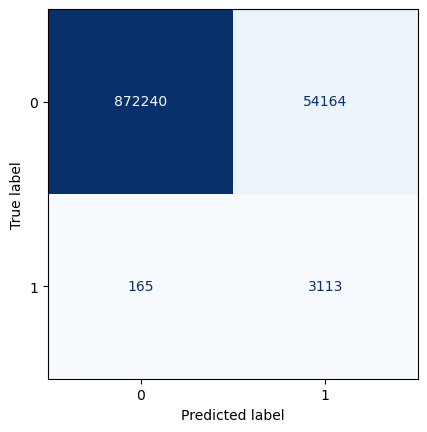

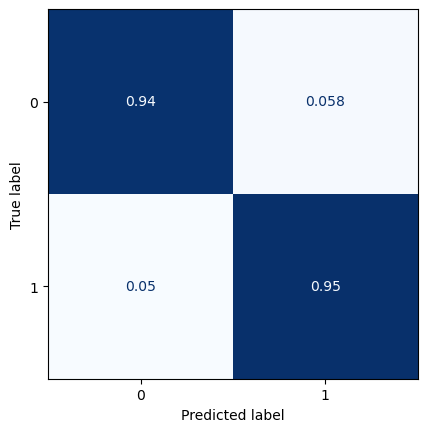

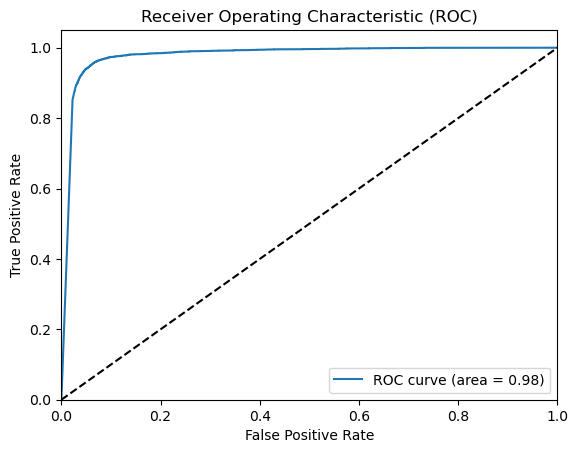

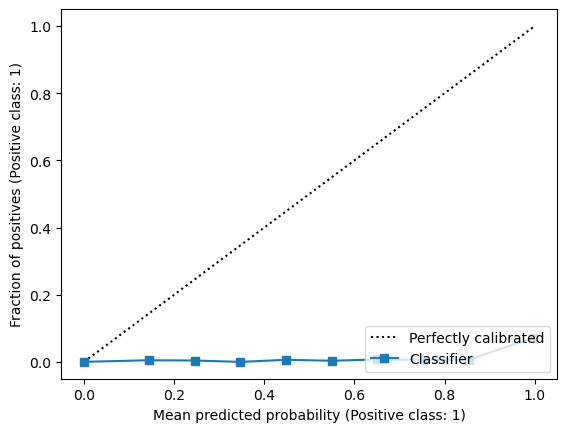

In [45]:
test_img_std = test_img_std
y_test_img = y_test_img

t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## New Target ... - 2019

In [71]:
model5 = Sequential()
model5.add(layers.Input(shape=(13, 29, 9)))

model5.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model5.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model5.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model5.add(layers.UpSampling2D((2,2)))

model5.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model5.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model5.summary()


model5.compile(loss='binary_crossentropy', optimizer='adam')

monmodel5itor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_4 (Cropping2D)   (None, 13, 29, 1)        

In [72]:
model5.fit(train_img_std_2019, y_train_img_2019, validation_data=(val_img_std_2019,y_val_img_2019),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0754 - val_loss: 0.0193
Epoch 2/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0191 - val_loss: 0.0151
Epoch 3/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0164 - val_loss: 0.0136
Epoch 4/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0154 - val_loss: 0.0130
Epoch 5/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0148 - val_loss: 0.0126
Epoch 6/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0144 - val_loss: 0.0125
Epoch 7/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0141 - val_loss: 0.0120
Epoch 8/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0138 - val_loss: 0.0118
Epoch 9/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0136 - val_loss: 0.0117
Epoch 10/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0134 - val_lo

42/42 [==============================] - 0s 2ms/step
0.003475988756482838
0.002281293077206272


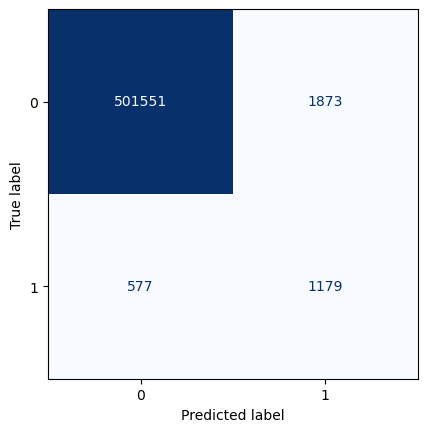

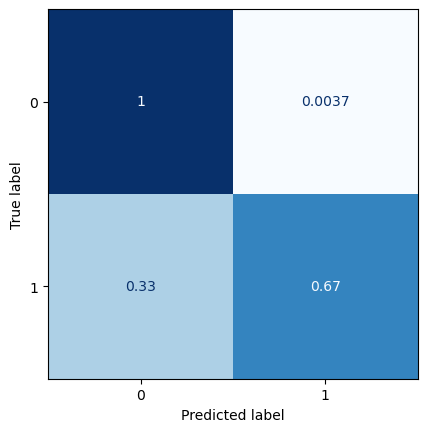

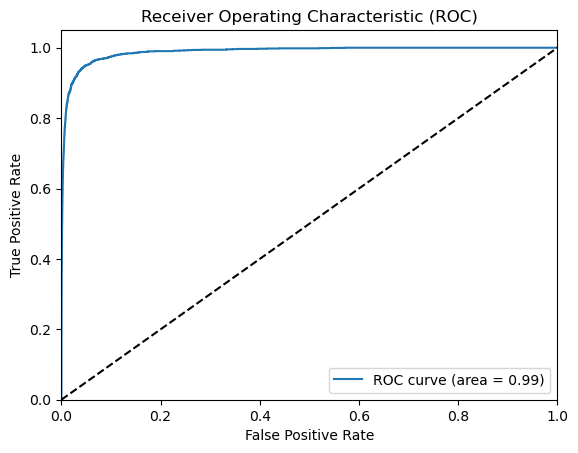

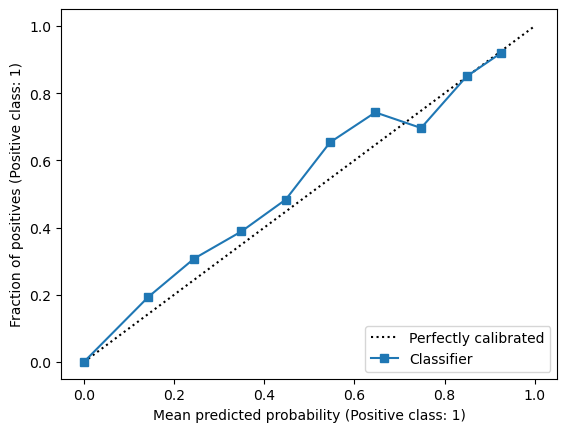

In [73]:
test_img_std = test_img_std_2019
y_test_img = y_test_img_2019

t = model5.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## old target 0-24h


In [50]:
model2 = Sequential()
model2.add(layers.Input(shape=(13, 29, 9)))

model2.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model2.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model2.add(layers.UpSampling2D((2,2)))

model2.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model2.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model2.summary()


model2.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)        

In [51]:
model2.fit(train_img_std_old24, y_train_img_old24, validation_data=(val_img_std_old24,y_val_img_old24),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0358 - val_loss: 0.0088
Epoch 2/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0095 - val_loss: 0.0072
Epoch 3/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0081 - val_loss: 0.0065
Epoch 4/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 5/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0070 - val_loss: 0.0057
Epoch 6/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 7/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0065 - val_loss: 0.0056
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 9/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 10/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0062 - val_lo

42/42 [==============================] - 0s 2ms/step
0.001751850825448355
0.0010988229119955075


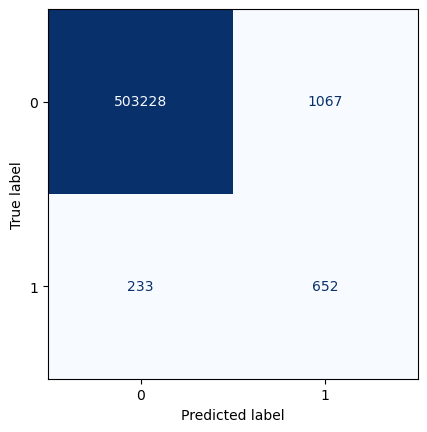

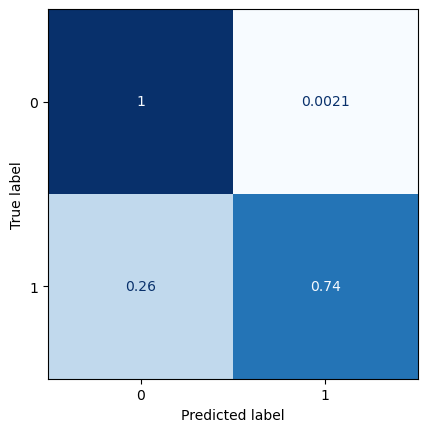

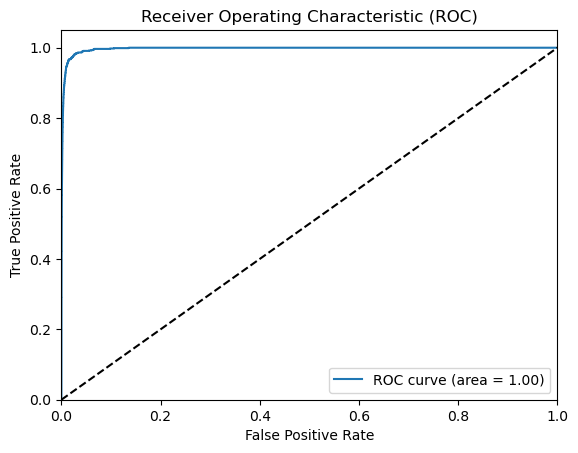

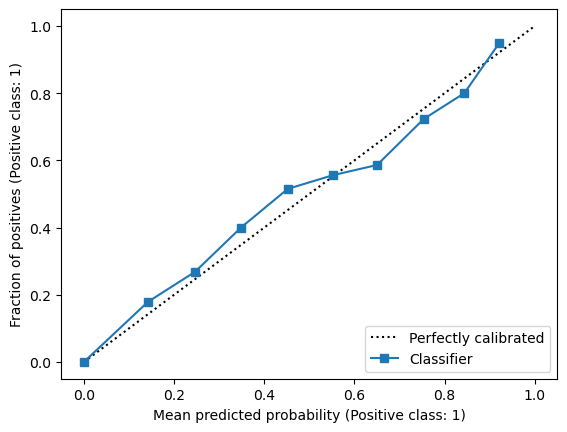

In [52]:
test_img_std = test_img_std_old24
y_test_img = y_test_img_old24

t = model2.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## old target 24-48h


In [55]:
model3 = Sequential()
model3.add(layers.Input(shape=(13, 29, 9)))

model3.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model3.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model3.add(layers.UpSampling2D((2,2)))

model3.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model3.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model3.summary()


model3.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d_2 (Cropping2D)   (None, 13, 29, 1)        

In [56]:
model3.fit(train_img_std_old48, y_train_img_old48, validation_data=(val_img_std_old48,y_val_img_old48),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0388 - val_loss: 0.0107
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0108 - val_loss: 0.0087
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 4/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0089 - val_loss: 0.0078
Epoch 6/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0086 - val_loss: 0.0076
Epoch 7/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0084 - val_loss: 0.0074
Epoch 8/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0082 - val_loss: 0.0075
Epoch 9/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 10/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0080 - val_lo

354/354 [==============================] - 2s 4ms/step - loss: 0.0065 - val_loss: 0.0067
Epoch 82/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 83/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0064 - val_loss: 0.0069
Epoch 84/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 85/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0064 - val_loss: 0.0067
Epoch 85: early stopping


42/42 [==============================] - 0s 2ms/step
0.001751850825448355
0.0014637201460378168


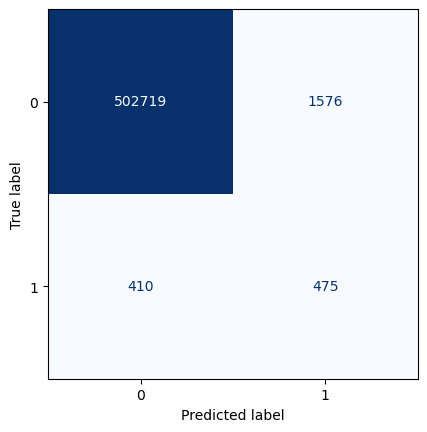

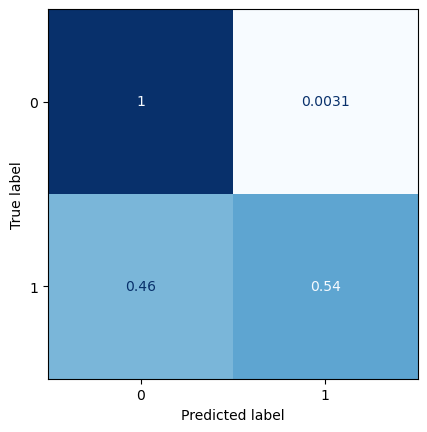

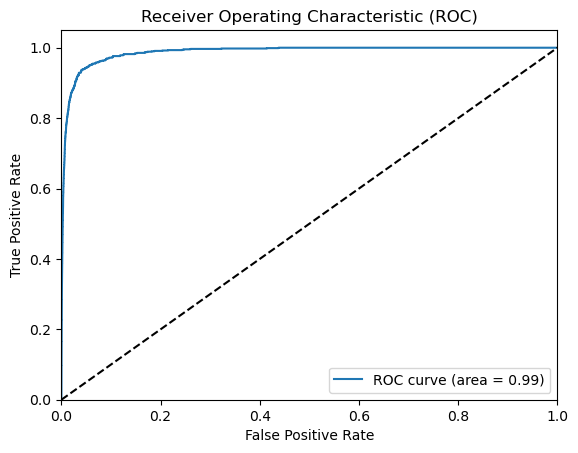

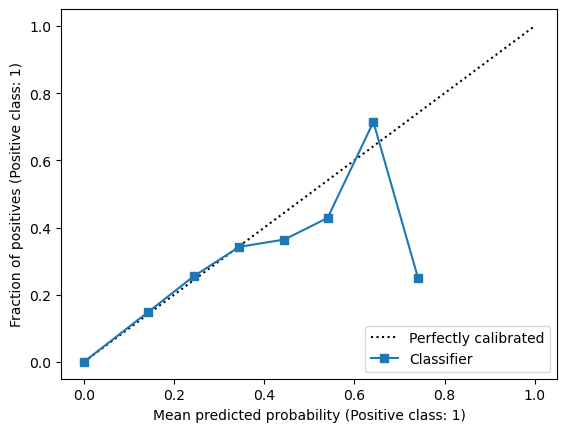

In [57]:
test_img_std = test_img_std_old48
y_test_img = y_test_img_old48

t = model3.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## old target, 0-24 or 24-48

In [62]:
# class 1 if there is a TC 2 days later

model4 = Sequential()
model4.add(layers.Input(shape=(13, 29, 9)))

model4.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model4.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))
model4
model4.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model4.add(layers.UpSampling2D((2,2)))

model4.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model4.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model4.summary()


model4.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_3 (Cropping2D)   (None, 13, 29, 1)        

In [64]:
model4.fit(train_img_std_old24_48, y_train_img_old24_48, validation_data=(val_img_std_old24_48,y_val_img_old24_48),
        callbacks=[monitor],epochs=100)


Epoch 1/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0624 - val_loss: 0.0144
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0143 - val_loss: 0.0115
Epoch 3/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0125 - val_loss: 0.0104
Epoch 4/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0118 - val_loss: 0.0101
Epoch 5/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0113 - val_loss: 0.0097
Epoch 6/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0110 - val_loss: 0.0095
Epoch 7/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch 8/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0105 - val_loss: 0.0093
Epoch 9/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 10/100
354/354 [==============================] - 2s 4ms/step - loss: 0.0101 - val_lo

42/42 [==============================] - 0s 2ms/step
0.0026742943109386752
0.0018356070137435431


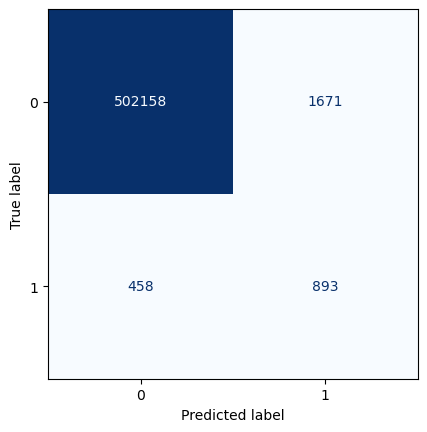

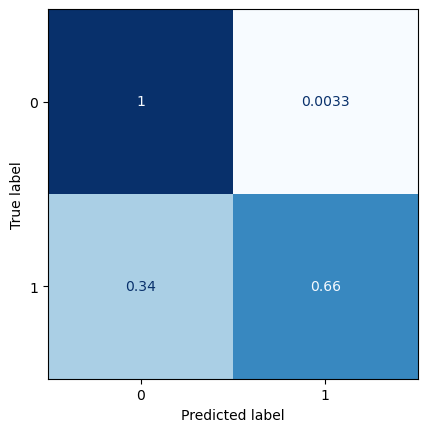

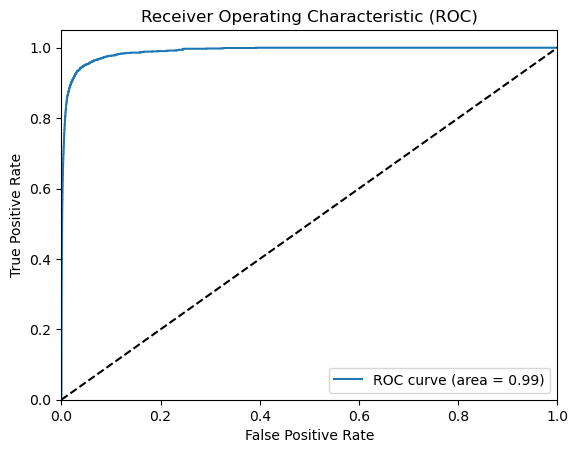

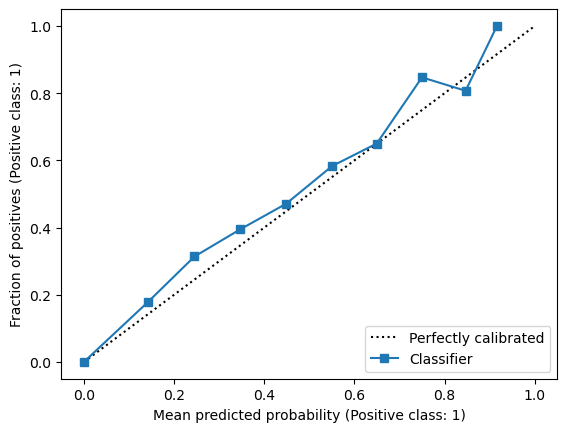

In [65]:
test_img_std = test_img_std_old24_48
y_test_img = y_test_img_old24_48

t = model4.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
classes[0]
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



# CNN 2 

## New Target

In [74]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 13, 29, 16)        1312      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 15, 16)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 15, 8)          1160      
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_5 (Cropping2D)   (None, 13, 29, 1)        

In [75]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0427 - val_loss: 0.0152
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0156 - val_loss: 0.0127
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0142 - val_loss: 0.0126
Epoch 4/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0134 - val_loss: 0.0116
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0129 - val_loss: 0.0111
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0125 - val_loss: 0.0109
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0122 - val_loss: 0.0104
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0120 - val_loss: 0.0105
Epoch 9/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0117 - val_loss: 0.0103
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0116 - val_lo

42/42 [==============================] - 0s 2ms/step
0.003475988756482838
0.002232188008919933


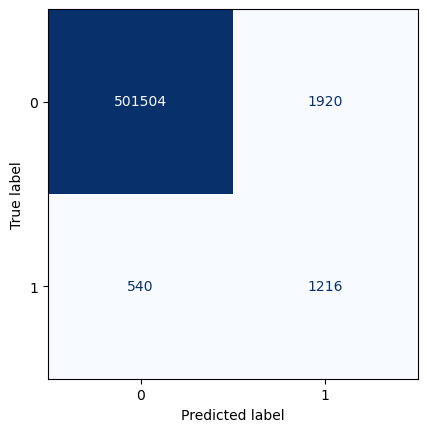

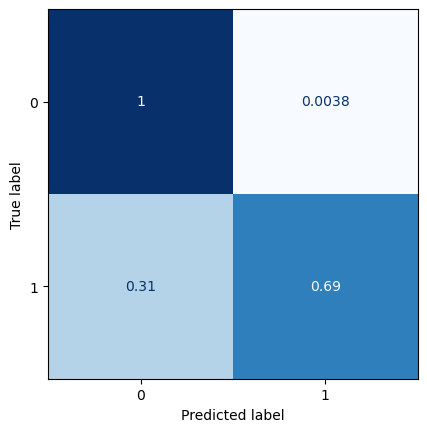

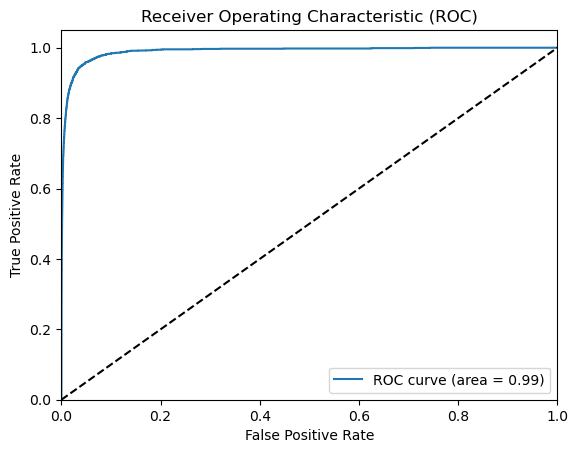

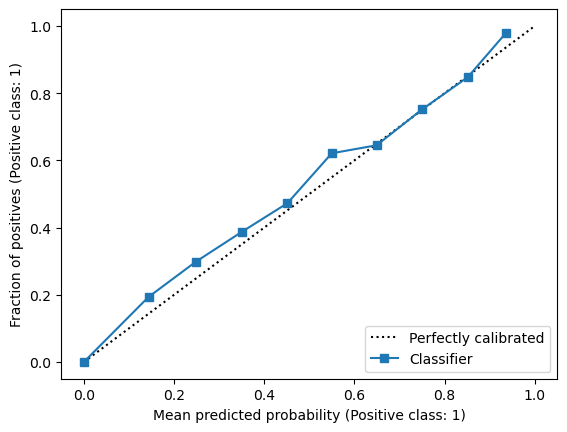

In [76]:
test_img_std = test_img_std
y_test_img = y_test_img

t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## New Target ... - 2019

In [79]:
model7 = Sequential()
model7.add(layers.Input(shape=(13, 29, 9)))

model7.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model7.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model7.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model7.add(layers.UpSampling2D((2,2)))



model7.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model7.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model7.summary()


model7.compile(loss='binary_crossentropy', optimizer='adam')

monmodel5itor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 13, 29, 16)        1312      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 15, 16)        0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 15, 8)          1160      
                                                                 
 up_sampling2d_8 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_7 (Cropping2D)   (None, 13, 29, 1)        

In [80]:
model7.fit(train_img_std_2019, y_train_img_2019, validation_data=(val_img_std_2019,y_val_img_2019),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0377 - val_loss: 0.0153
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0165 - val_loss: 0.0138
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0153 - val_loss: 0.0131
Epoch 4/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0144 - val_loss: 0.0125
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0138 - val_loss: 0.0126
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0133 - val_loss: 0.0116
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0128 - val_loss: 0.0109
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0125 - val_loss: 0.0107
Epoch 9/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0123 - val_loss: 0.0107
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0121 - val_lo

42/42 [==============================] - 0s 2ms/step
0.003475988756482838
0.0022260407160649667


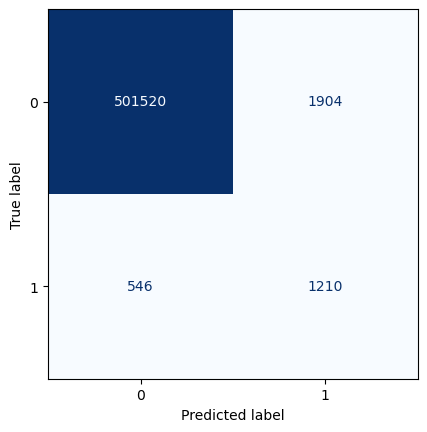

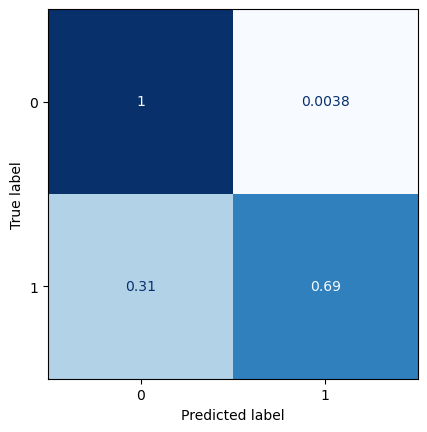

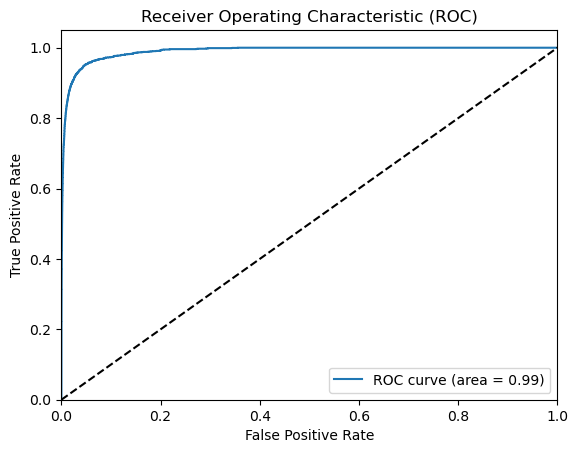

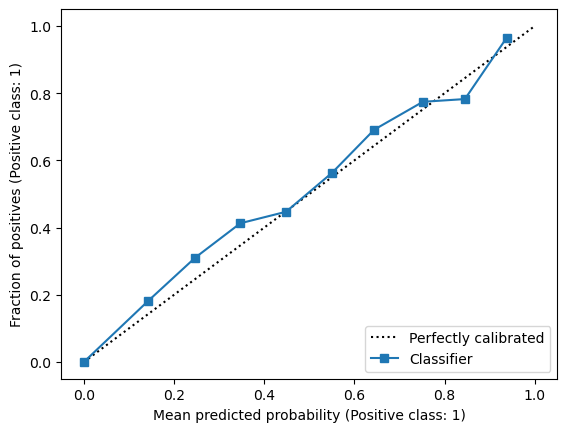

In [82]:
test_img_std = test_img_std_2019
y_test_img = y_test_img_2019

t = model7.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## old target 0-24h


In [83]:
model8 = Sequential()
model8.add(layers.Input(shape=(13, 29, 9)))

model8.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model8.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model8.add(layers.UpSampling2D((2,2)))

model8.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model8.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model8.summary()


model8.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 13, 29, 16)        1312      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 15, 16)        0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 15, 8)          1160      
                                                                 
 up_sampling2d_9 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_8 (Cropping2D)   (None, 13, 29, 1)        

In [84]:
model8.fit(train_img_std_old24, y_train_img_old24, validation_data=(val_img_std_old24,y_val_img_old24),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0464 - val_loss: 0.0089
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0091 - val_loss: 0.0066
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0077 - val_loss: 0.0061
Epoch 4/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0071 - val_loss: 0.0057
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0067 - val_loss: 0.0055
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0065 - val_loss: 0.0053
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 9/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0059 - val_lo

42/42 [==============================] - 0s 2ms/step
0.001751850825448355
0.0011031633475402387


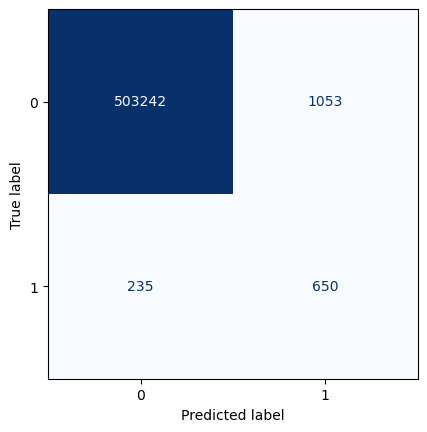

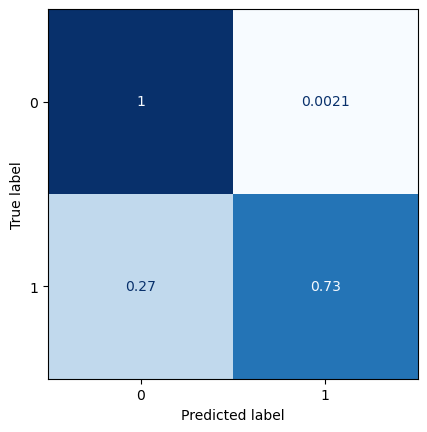

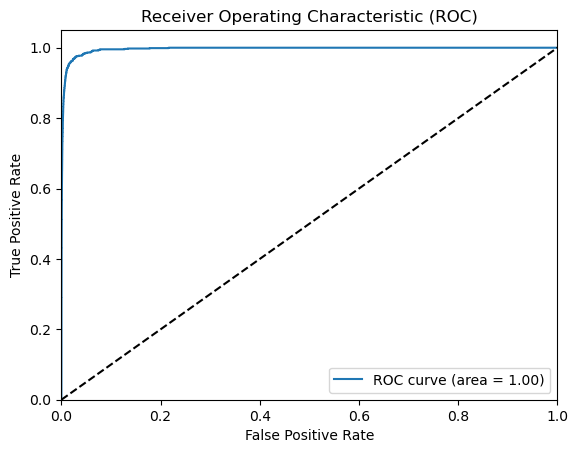

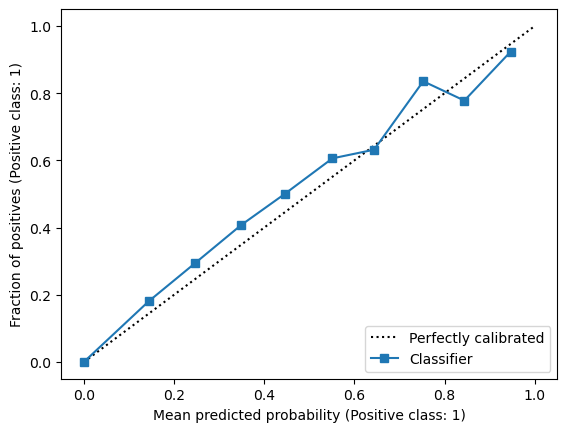

In [85]:
test_img_std = test_img_std_old24
y_test_img = y_test_img_old24

t = model8.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## old target 24-48h


In [90]:
model9 = Sequential()
model9.add(layers.Input(shape=(13, 29, 9)))
model9
model9.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model9.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model9.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model9.add(layers.UpSampling2D((2,2)))

model9.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model9.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model9.summary()


model9.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 13, 29, 16)        1312      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 15, 8)          1160      
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_10 (Cropping2D)  (None, 13, 29, 1)       

In [91]:
model9.fit(train_img_std_old48, y_train_img_old48, validation_data=(val_img_std_old48,y_val_img_old48),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0234 - val_loss: 0.0093
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 4/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0087 - val_loss: 0.0077
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0083 - val_loss: 0.0073
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0081 - val_loss: 0.0073
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0078 - val_loss: 0.0071
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 9/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0075 - val_loss: 0.0070
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0073 - val_lo

42/42 [==============================] - 0s 2ms/step
0.001751850825448355
0.0014310453426593307


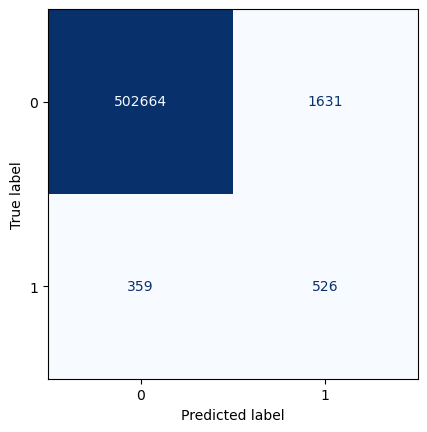

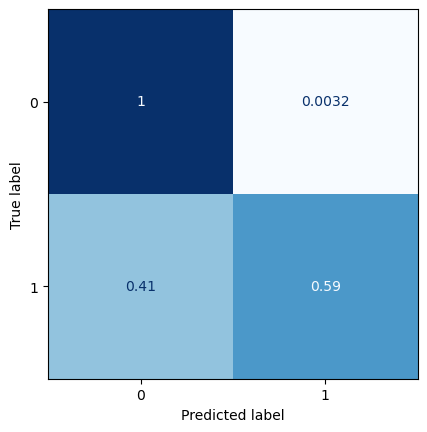

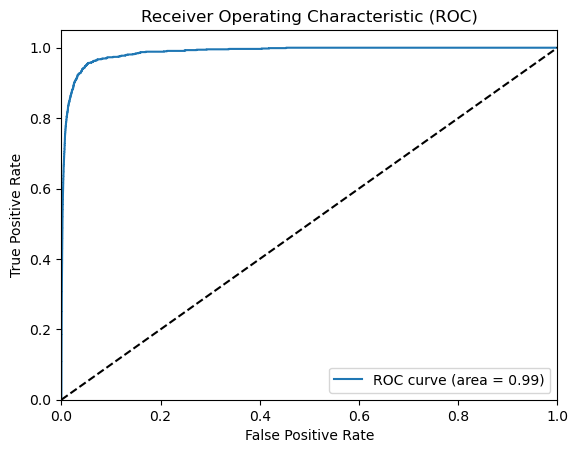

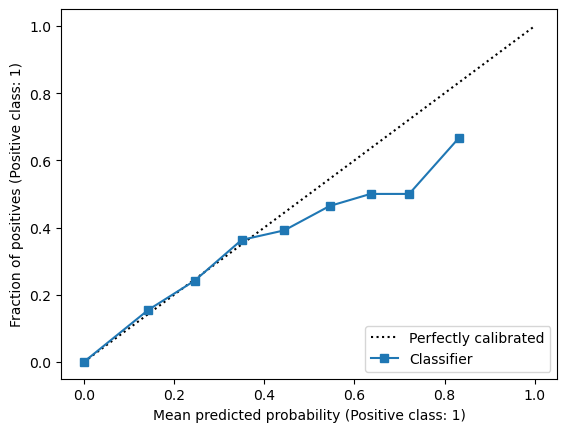

In [92]:
test_img_std = test_img_std_old48
y_test_img = y_test_img_old48

t = model9.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## old target, 0-24 or 24-48

In [93]:
# class 1 if there is a TC 2 days later

model00 = Sequential()
model00.add(layers.Input(shape=(13, 29, 9)))

model00.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model00.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model00.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model00.add(layers.UpSampling2D((2,2)))

model00.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model00.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model00.summary()


model00.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 13, 29, 16)        1312      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 7, 15, 8)          1160      
                                                                 
 up_sampling2d_12 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_11 (Cropping2D)  (None, 13, 29, 1)       

In [94]:
model00.fit(train_img_std_old24_48, y_train_img_old24_48, validation_data=(val_img_std_old24_48,y_val_img_old24_48),
        callbacks=[monitor],epochs=100)


Epoch 1/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0612 - val_loss: 0.0124
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0131 - val_loss: 0.0106
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0117 - val_loss: 0.0098
Epoch 4/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0110 - val_loss: 0.0096
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0101 - val_loss: 0.0088
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0099 - val_loss: 0.0087
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 9/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0093 - val_lo

42/42 [==============================] - 0s 2ms/step
0.0026742943109386752
0.0017864344036741381


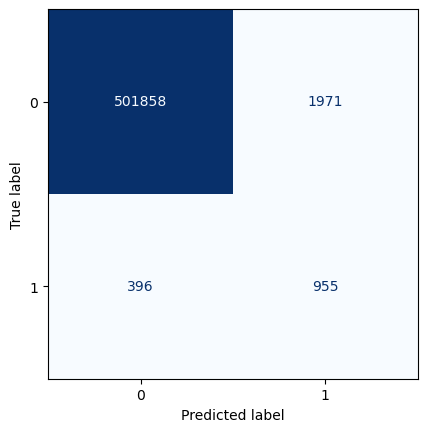

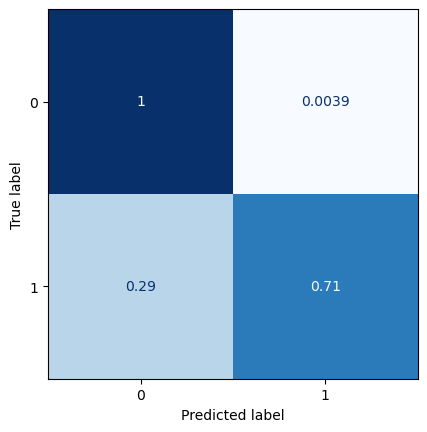

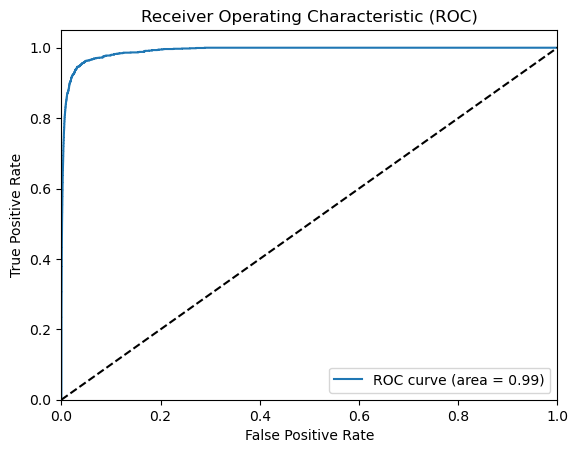

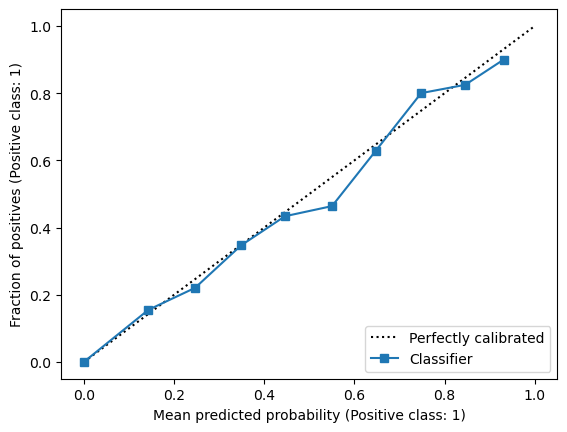

In [95]:
test_img_std = test_img_std_old24_48
y_test_img = y_test_img_old24_48

t = model00.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
classes[0]
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)

